In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
K = 2

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

centroids1 = np.array([[3.0, 3.0], [2.0, 2.0]])

def distance(a, b):
    return np.linalg.norm(a - b)

def assign(X, centroids):
    clusters = []
    for point in X:
        d = [distance(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(d))
    return np.array(clusters)

def update(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        datapoints = X[clusters == i]
        if len(datapoints) > 0: 
            centroids[i] = datapoints.mean(axis=0)
    return centroids

def kmeans(X, init_c, epochs, threshold):
    centroids = init_c
    clusters = []
    for epoch in range(epochs):
        clusters = assign(X, centroids)
        new_centroids = update(X, clusters, len(centroids))
        
        diff = np.linalg.norm(new_centroids - centroids)
        if diff < threshold:
            break
        centroids = new_centroids
    return centroids, clusters


def plot_graph(X, centroids, clusters, title):
    plt.figure(figsize=(7, 5))
    colors = plt.get_cmap("tab10").colors  
    colors = colors[:K]
    
    for i in range(len(centroids)):
        points = X[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', edgecolor='black', label='Centroids')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()


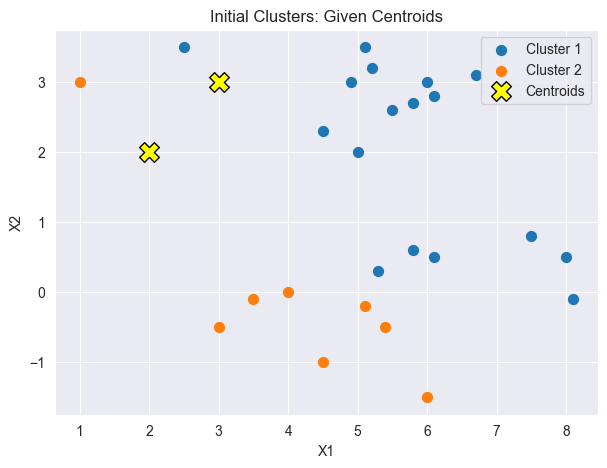

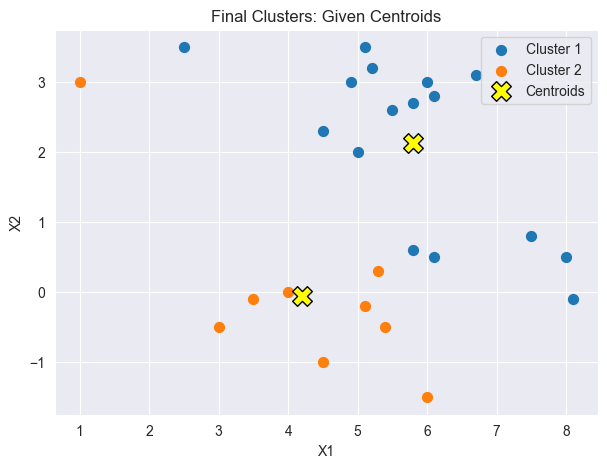

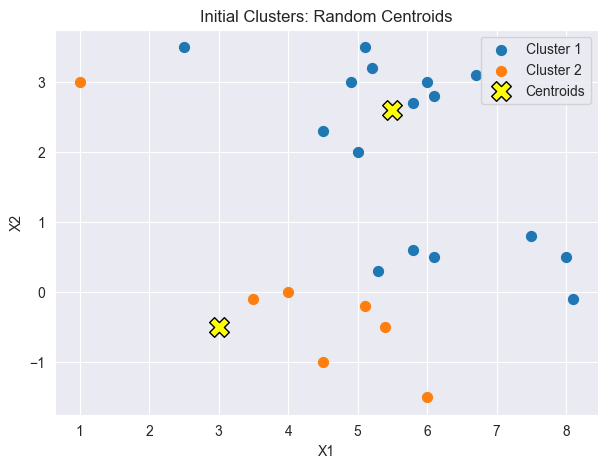

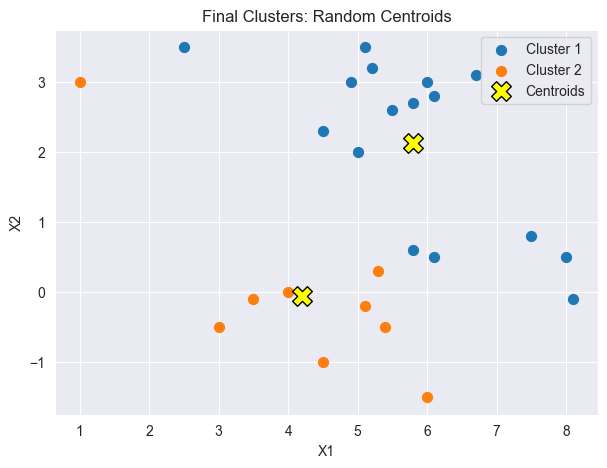

Final Centroids with Provided Initial Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Final Centroids with Random Initial Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [39]:
f_centroids1, cluster1 = kmeans(X, centroids1, 100, 1e-4)

np.random.seed(42)  
centroids2 = X[np.random.choice(X.shape[0], 2, replace=False)]
f_centroids2, cluster2 = kmeans(X, centroids2, 100, 1e-4)

plot_graph(X, centroids1, assign(X, centroids1), "Initial Clusters: Given Centroids")
plot_graph(X, f_centroids1, cluster1, "Final Clusters: Given Centroids")

plot_graph(X, centroids2, assign(X, centroids2), "Initial Clusters: Random Centroids")
plot_graph(X, f_centroids2, cluster2, "Final Clusters: Random Centroids")

print("Final Centroids with Provided Initial Centroids:")
print(f_centroids1)
print("\nFinal Centroids with Random Initial Centroids:")
print(f_centroids2)

In [40]:
print(centroids2)

[[ 5.5  2.6]
 [ 3.  -0.5]]


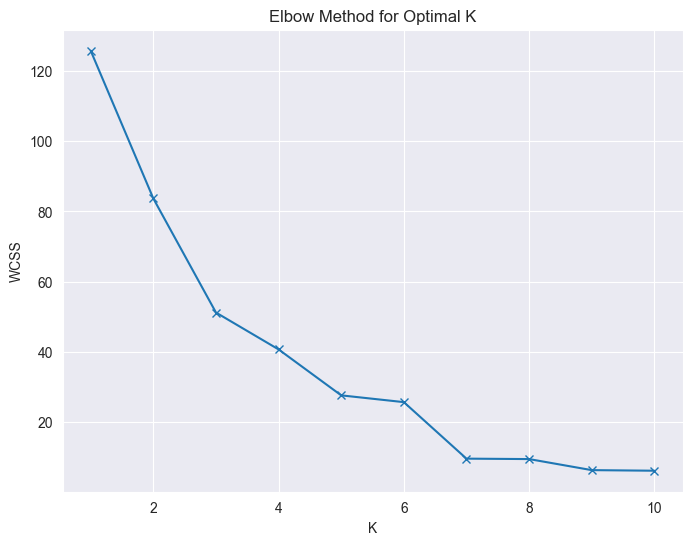

In [41]:
def kmeans(X, init_c, epochs, threshold):
    centroids = init_c
    clusters = []
    for epoch in range(epochs):
        clusters = assign(X, centroids)
        new_centroids = update(X, clusters, len(centroids))
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < threshold:
            break
        centroids = new_centroids
    
    wcss = 0
    for i in range(len(init_c)):
        points = X[clusters == i]
        wcss += np.sum((points - centroids[i])**2)
    
    return centroids, clusters, wcss

results = []

for k in range(1, 11):
    np.random.seed(42)
    init_c = X[np.random.choice(X.shape[0], k, replace=False)]
    centroids, clusters, wcss = kmeans(X, init_c, 100, 1e-1)
    results.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), results, marker='x')
plt.title("Elbow Method for Optimal K")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
 

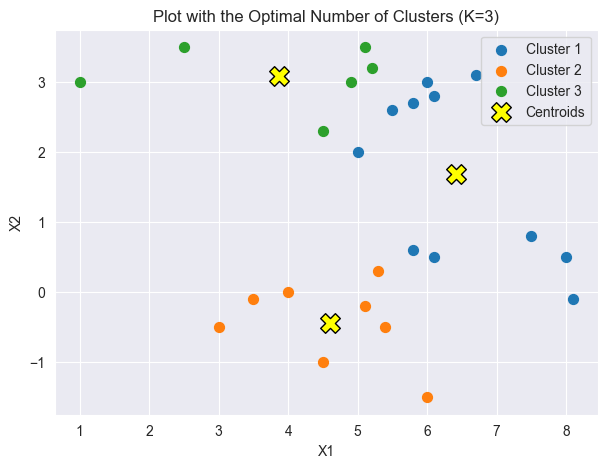

Initial Position of centroids [[ 5.5  2.6]
 [ 3.  -0.5]
 [ 5.1  3.5]]
Final Position of centroids:  [[ 6.41818182  1.68181818]
 [ 4.6        -0.4375    ]
 [ 3.86666667  3.08333333]]


In [47]:
K = int(input("Enter K: "))

np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
f_centroids, f_clusters, wcss = kmeans(X, centroids, 100, 1e-4)
plot_graph(X, f_centroids, f_clusters, f"Plot with the Optimal Number of Clusters (K={K})")
print("Initial Position of centroids", centroids)
print("Final Position of centroids: ", f_centroids)